In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, ConvLSTM2D, Flatten

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

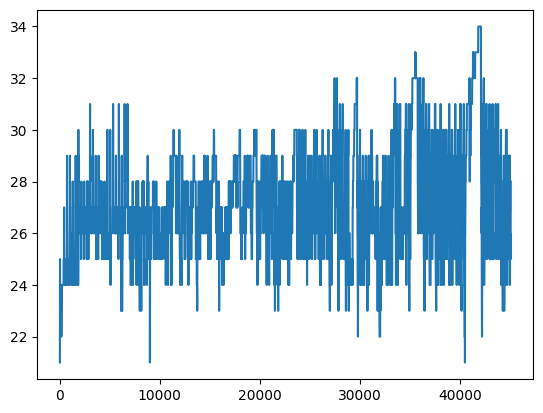

In [108]:
df = read_csv('./data/data.csv', usecols = [1])

df.head()
plt.plot(df)

In [118]:
dataset = df.values
dataset = dataset.astype('float32')

In [119]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

In [120]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size

train, test = dataset[:train_size], dataset[train_size:]

print(train.shape)
print(test.shape)

(36080, 1)
(9020, 1)


In [121]:
def sequence(dataset, sequence_size = 1):
    x,  y = [], []

    for i in range(len(dataset) - sequence_size):
        xs = dataset[i: (i + sequence_size)]
        ys = dataset[i + sequence_size]

        x.append(xs)
        y.append(ys)

    return np.array(x), np.array(y)

In [122]:
train_x, train_y = sequence(train, 5)
test_x, test_y = sequence(test, 5)

print(train_x.shape)
print(test_x.shape)

(36075, 5, 1)
(9015, 5, 1)


In [123]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [124]:
test_y = scaler.inverse_transform(test_y)

In [69]:
model = Sequential()
model.add(LSTM(64, input_shape = (None, 5)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,145
Trainable params: 22,145
Non-trainable params: 0
_________________________________________________________________


2024-07-06 19:18:48.793049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-06 19:18:48.794239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-06 19:18:48.794937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [71]:
model.fit(train_x, train_y, validation_data = (test_x, test_y), verbose = 2, epochs = 100)

Epoch 1/100


2024-07-06 19:20:37.881792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-07-06 19:20:37.883278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-07-06 19:20:37.884119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1128/1128 - 3s - loss: 0.0019 - val_loss: 5.2508e-04 - 3s/epoch - 2ms/step
Epoch 2/100
1128/1128 - 1s - loss: 4.8437e-04 - val_loss: 5.4059e-04 - 1s/epoch - 1ms/step
Epoch 3/100
1128/1128 - 1s - loss: 4.7826e-04 - val_loss: 5.3117e-04 - 1s/epoch - 1ms/step
Epoch 4/100
1128/1128 - 1s - loss: 4.8443e-04 - val_loss: 5.8167e-04 - 1s/epoch - 1ms/step
Epoch 5/100
1128/1128 - 1s - loss: 4.8202e-04 - val_loss: 6.0001e-04 - 1s/epoch - 1ms/step
Epoch 6/100
1128/1128 - 1s - loss: 4.7655e-04 - val_loss: 4.5539e-04 - 1s/epoch - 1ms/step
Epoch 7/100
1128/1128 - 1s - loss: 4.7540e-04 - val_loss: 5.1691e-04 - 1s/epoch - 1ms/step
Epoch 8/100
1128/1128 - 1s - loss: 4.7671e-04 - val_loss: 4.6244e-04 - 1s/epoch - 1ms/step
Epoch 9/100
1128/1128 - 1s - loss: 4.6851e-04 - val_loss: 4.5518e-04 - 1s/epoch - 1ms/step
Epoch 10/100
1128/1128 - 1s - loss: 4.7388e-04 - val_loss: 5.9410e-04 - 1s/epoch - 1ms/step
Epoch 11/100
1128/1128 - 1s - loss: 4.7526e-04 - val_loss: 4.9745e-04 - 1s/epoch - 1ms/step
Epoch 12/100


In [139]:
test_predict = model.predict(test_x)
test_predict = scaler.inverse_transform(test_predict)

282/282 [==============================] - 0s 721us/step


In [140]:
print(mean_squared_error(test_y, test_predict))

0.07557254


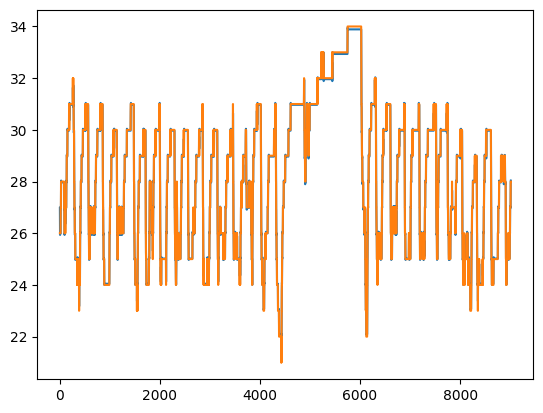

In [144]:
plt.plot(test_predict)
plt.plot(test_y)